<a href="https://colab.research.google.com/github/Arboleda5252/ProyectoKaggle_20252/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

02 - preprocesado.ipynb donde se muestra cómo cargas el archivo train.csv de la competencia y realizas las operaciones de limpieza y preprocesado de datos que necesites (p.ej. convertir columnas en one-hot, normalizar valores de rangos, imputar datos faltantes, etc.)

In [1]:
import pandas as pd
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [4]:
!kaggle

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: the following arguments are required: command


In [5]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.37GB/s]


In [6]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [7]:
z = pd.read_csv('train.csv')

In [8]:
print(z.shape)

(692500, 21)


In [9]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [10]:
# Datos faltantes
for i in z.columns:
    print(i, z[i].isna().sum())

ID 0
PERIODO_ACADEMICO 0
E_PRGM_ACADEMICO 0
E_PRGM_DEPARTAMENTO 0
E_VALORMATRICULAUNIVERSIDAD 6287
E_HORASSEMANATRABAJA 30857
F_ESTRATOVIVIENDA 32137
F_TIENEINTERNET 26629
F_EDUCACIONPADRE 23178
F_TIENELAVADORA 39773
F_TIENEAUTOMOVIL 43623
E_PRIVADO_LIBERTAD 0
E_PAGOMATRICULAPROPIO 6498
F_TIENECOMPUTADOR 38103
F_TIENEINTERNET.1 26629
F_EDUCACIONMADRE 23664
RENDIMIENTO_GLOBAL 0
INDICADOR_1 0
INDICADOR_2 0
INDICADOR_3 0
INDICADOR_4 0


In [11]:
# F_TIENEINTERNET 26629
z.F_TIENEINTERNET.value_counts()

,count
F_TIENEINTERNET,
Si,592514
No,73357


In [12]:
# E_VALORMATRICULAUNIVERSIDAD 6287
z.E_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
E_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [13]:
z.RENDIMIENTO_GLOBAL.value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


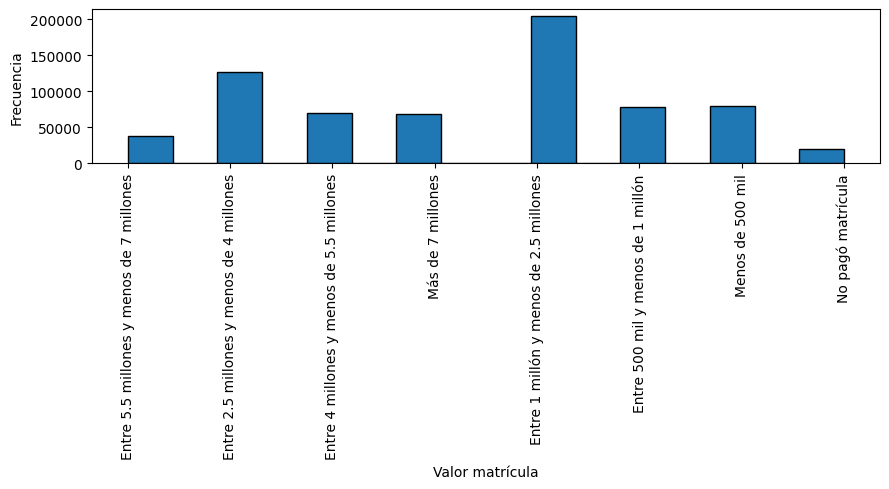

In [14]:
# HISTOGRAMA DE VALOR MATRICULA
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(z.E_VALORMATRICULAUNIVERSIDAD.dropna().values, bins=16, edgecolor='black')
ax.set_xlabel('Valor matrícula')
ax.set_ylabel('Frecuencia')

# Etiquetas verticales
ax.tick_params(axis='x', labelrotation=90)
ax.xaxis.set_major_locator(MaxNLocator(nbins=8))

fig.tight_layout()

plt.show()

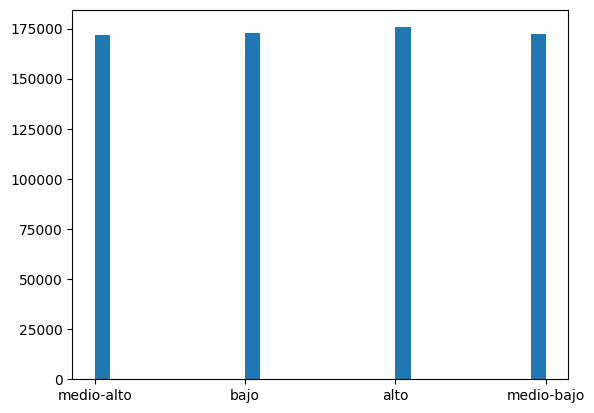

In [15]:
# HISTOGRAMA RENDIMIENTO GLOBAL
plt.hist(z.RENDIMIENTO_GLOBAL.dropna().values, bins=30);

In [66]:
# Copia de Train.csv
z = z.copy()
z1 = z.copy()

In [67]:
z1.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [68]:
# Quitemos las columnas no informativas
del(z1["ID"])
del(z1["PERIODO_ACADEMICO"])
del(z1["E_PRGM_DEPARTAMENTO"])
del(z1["E_PRGM_ACADEMICO"])
del(z1["E_PRIVADO_LIBERTAD"])
del(z1["F_EDUCACIONPADRE"])
del(z1["F_EDUCACIONMADRE"])
del(z1["E_VALORMATRICULAUNIVERSIDAD"])
del(z1["F_ESTRATOVIVIENDA"])

z1

,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,Menos de 10 horas,Si,Si,Si,No,Si,Si,medio-alto,0.322,0.208,0.310,0.267
1,0,No,Si,No,No,Si,No,bajo,0.311,0.215,0.292,0.264
2,Más de 30 horas,Si,Si,No,No,No,Si,bajo,0.297,0.214,0.305,0.264
3,0,Si,Si,No,No,Si,Si,alto,0.485,0.172,0.252,0.190
4,Entre 21 y 30 horas,Si,Si,Si,No,Si,Si,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,Entre 11 y 20 horas,Si,Si,No,Si,Si,Si,medio-alto,0.237,0.271,0.271,0.311
692496,Más de 30 horas,Si,Si,No,No,Si,Si,bajo,0.314,0.240,0.278,0.260
692497,Menos de 10 horas,Si,Si,No,Si,Si,Si,medio-bajo,0.286,0.240,0.314,0.287
692498,Menos de 10 horas,No,No,No,Si,Si,No,bajo,0.132,0.426,0.261,0.328


In [69]:
# MODA
for i in z1.columns:
    print(i, z1[i].isna().sum())

E_HORASSEMANATRABAJA 30857
F_TIENEINTERNET 26629
F_TIENELAVADORA 39773
F_TIENEAUTOMOVIL 43623
E_PAGOMATRICULAPROPIO 6498
F_TIENECOMPUTADOR 38103
F_TIENEINTERNET.1 26629
RENDIMIENTO_GLOBAL 0
INDICADOR_1 0
INDICADOR_2 0
INDICADOR_3 0
INDICADOR_4 0


In [44]:
z1.F_TIENEINTERNET.value_counts()

,count
F_TIENEINTERNET,
Si,592514
No,73357


In [45]:
z1.F_TIENELAVADORA.value_counts()

,count
F_TIENELAVADORA,
Si,563390
No,89337


In [46]:
z1.F_TIENEAUTOMOVIL.value_counts()

,count
F_TIENEAUTOMOVIL,
No,412606
Si,236271


In [47]:
z1.E_PAGOMATRICULAPROPIO.value_counts()

,count
E_PAGOMATRICULAPROPIO,
No,382201
Si,303801


In [48]:
z1.F_TIENECOMPUTADOR.value_counts()

,count
F_TIENECOMPUTADOR,
Si,597670
No,56727


In [53]:
z1.E_HORASSEMANATRABAJA.value_counts()

,count
E_HORASSEMANATRABAJA,
Más de 30 horas,249352
0,116550
Entre 11 y 20 horas,115857
Entre 21 y 30 horas,92693
Menos de 10 horas,87191


In [57]:
z1['F_TIENEINTERNET.1'].value_counts()

,count
F_TIENEINTERNET.1,
Si,592514
No,73357


In [70]:
# Rellenar los valores faltantes
z1["F_TIENEINTERNET"] = z1.F_TIENEINTERNET.fillna("Si")
z1["F_TIENELAVADORA"] = z1.F_TIENELAVADORA.fillna("Si")
z1["F_TIENEAUTOMOVIL"] = z1.F_TIENEAUTOMOVIL.fillna("No")
z1["E_PAGOMATRICULAPROPIO"] = z.E_PAGOMATRICULAPROPIO.fillna("No")
z1["F_TIENECOMPUTADOR"] = z1.F_TIENECOMPUTADOR.fillna("Si")
z1["E_HORASSEMANATRABAJA"] = z1.E_HORASSEMANATRABAJA.fillna("Más de 30 horas")
z1['F_TIENEINTERNET.1'] = z1['F_TIENEINTERNET.1'].fillna("Si")

In [71]:
z1.head()

,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,Menos de 10 horas,Si,Si,Si,No,Si,Si,medio-alto,0.322,0.208,0.310,0.267
1,0,No,Si,No,No,Si,No,bajo,0.311,0.215,0.292,0.264
2,Más de 30 horas,Si,Si,No,No,No,Si,bajo,0.297,0.214,0.305,0.264
3,0,Si,Si,No,No,Si,Si,alto,0.485,0.172,0.252,0.190
4,Entre 21 y 30 horas,Si,Si,Si,No,Si,Si,medio-bajo,0.316,0.232,0.285,0.294


In [72]:
for i in z1.columns:
    print(i, z1[i].isna().sum())

E_HORASSEMANATRABAJA 0
F_TIENEINTERNET 0
F_TIENELAVADORA 0
F_TIENEAUTOMOVIL 0
E_PAGOMATRICULAPROPIO 0
F_TIENECOMPUTADOR 0
F_TIENEINTERNET.1 0
RENDIMIENTO_GLOBAL 0
INDICADOR_1 0
INDICADOR_2 0
INDICADOR_3 0
INDICADOR_4 0


In [64]:
# Transformar a Binarios
import pandas as pd
import numpy as np

binarias = [
    'F_TIENEINTERNET',
    'F_TIENELAVADORA',
    'F_TIENEAUTOMOVIL',
    'E_PAGOMATRICULAPROPIO',
    'F_TIENECOMPUTADOR',
    'F_TIENEINTERNET.1',
]

# Mapeo Sí/No -> 1/0
def binarios(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip().str.lower()
    s = s.replace({'': pd.NA})
    mapped = s.map({'si': 1, 'no': 0})
    mapped = mapped.where(~s.isin(['nan']), other=pd.NA)
    return mapped.astype('Int8')

z1[binarias] = z1[binarias].apply(binarios)


In [73]:
# # Transformar a Binarios
import pandas as pd
import numpy as np
import unicodedata
import re

def _normalize_text(x: str) -> str:
    if pd.isna(x):
        return x
    # forzar str, strip, lowercase y tildes
    s = str(x).strip().lower()
    s = unicodedata.normalize("NFKD", s)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    return s

# Mapeo Sí/No -> 1/0
def binarios(series: pd.Series) -> pd.Series:
    mask_na = series.isna()
    normalized = series.where(mask_na == False).map(_normalize_text)
    is_yes = normalized.str.match(r'^(si|s)$', na=False)
    is_no  = normalized.str.match(r'^(no|n)$', na=False)
    out = pd.Series(pd.NA, index=series.index, dtype="Int8")
    out[is_yes] = 1
    out[is_no]  = 0
    return out

z1 = z1.copy()
cols = [
    'F_TIENEINTERNET',
    'F_TIENELAVADORA',
    'F_TIENEAUTOMOVIL',
    'E_PAGOMATRICULAPROPIO',
    'F_TIENECOMPUTADOR',
    'F_TIENEINTERNET.1',
]
z1[cols] = z1[cols].apply(binarios)

In [74]:
z1.head()

,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,Menos de 10 horas,1,1,1,0,1,1,medio-alto,0.322,0.208,0.310,0.267
1,0,0,1,0,0,1,0,bajo,0.311,0.215,0.292,0.264
2,Más de 30 horas,1,1,0,0,0,1,bajo,0.297,0.214,0.305,0.264
3,0,1,1,0,0,1,1,alto,0.485,0.172,0.252,0.190
4,Entre 21 y 30 horas,1,1,1,0,1,1,medio-bajo,0.316,0.232,0.285,0.294


In [75]:
z1.F_TIENEINTERNET.value_counts()

,count
F_TIENEINTERNET,
1,619143
0,73357


In [77]:
# one-hot a la columna RENDIMIENTO_GLOBAL
z2 = z1.copy()
oh = pd.get_dummies(
    z2['RENDIMIENTO_GLOBAL'],
    prefix='REND',
    dummy_na=True
)

z2 = z2.drop(columns=['RENDIMIENTO_GLOBAL']).join(oh)

print(z2.filter(like='REND_').head())

   REND_alto  REND_bajo  REND_medio-alto  REND_medio-bajo  REND_nan
0      False      False             True            False     False
1      False       True            False            False     False
2      False       True            False            False     False
3       True      False            False            False     False
4      False      False            False             True     False


In [78]:
z2.head()

,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4,REND_alto,REND_bajo,REND_medio-alto,REND_medio-bajo,REND_nan
0,Menos de 10 horas,1,1,1,0,1,1,0.322,0.208,0.310,0.267,False,False,True,False,False
1,0,0,1,0,0,1,0,0.311,0.215,0.292,0.264,False,True,False,False,False
2,Más de 30 horas,1,1,0,0,0,1,0.297,0.214,0.305,0.264,False,True,False,False,False
3,0,1,1,0,0,1,1,0.485,0.172,0.252,0.190,True,False,False,False,False
4,Entre 21 y 30 horas,1,1,1,0,1,1,0.316,0.232,0.285,0.294,False,False,False,True,False


In [ ]:
#Juntar transformaciones